<center> 
<h1> Data analysis programming project </h1>
<h4> Rafael Takata García </h4>
<h5> Spring 2024 </h5>
 </center>

School is a stage of formation in which we develop skills and knowledge like no other. Understanding the factors that affect student performance would help us create an educational system capable of maximizing learning and really take advantage of the education received.

In 2014, Paulo Cortez and Alice Silva dedicated themselves to collecting the largest number of features of some students in secondary schools in the country of Portugal. Two groups were studied, people who studied Portuguese and those who studied mathematics. For this project, we will work with the fisrt to try to develop a prediction model for the second.

The creation of a model capable of describing this relationship would tell us about the areas of opportunity within the nation's educational system in addition to significant insights about the country's youth.

### References

 
Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

### Variables

**The variables are the following:** 
 - school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
 - sex - student's sex (binary: 'F' - female or 'M' - male)
 - age - student's age (numeric: from 15 to 22)
 - address - student's home address type (binary: 'U' - urban or 'R' - rural)
 - famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
 - Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
 - Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 - Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 - Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 - Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 - reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
 - guardian - student's guardian (nominal: 'mother', 'father' or 'other')
 - traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
 - studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
 - failures - number of past class failures (numeric: n if 1<=n<3, else 4)
 - schoolsup - extra educational support (binary: yes or no)
 - famsup - family educational support (binary: yes or no)
 - paid - extra paid classes within the course subject (binary: yes or no)
 - activities - extra-curricular activities (binary: yes or no)
 - nursery - attended nursery school (binary: yes or no)
 - higher - wants to take higher education (binary: yes or no)
 - internet - Internet access at home (binary: yes or no)
 - romantic - with a romantic relationship (binary: yes or no)
 - famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
 - freetime - free time after school (numeric: from 1 - very low to 5 - very high)
 - goout - going out with friends (numeric: from 1 - very low to 5 - very high)
 - Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - health - current health status (numeric: from 1 - very bad to 5 - very good)
 - absences - number of school absences (numeric: from 0 to 93)
 - These grades are related to the course subject for Portuguese:
 - G1 - first period grade (numeric: from 0 to 20)
 - G2 - second period grade (numeric: from 0 to 20)
 - G3 - final grade (numeric: from 0 to 20, output target)


### Libraries

In [366]:
import numpy as np #Work with arrays
import pandas as pd #Dataframes
import seaborn as sns #Heatmap
import matplotlib.pyplot as plt #Plotting for graphs
from sklearn.preprocessing import LabelEncoder

### Creation of the dataframe and general info

In [367]:
#Creacion of the dataframe
porclass_df = pd.read_csv('../data/raw/student-por.csv')
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [368]:
#We have 649 rows and 33 columns
porclass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [369]:
# Unique values
porclass_df.apply(lambda x: x.unique())

school                                                 [GP, MS]
sex                                                      [F, M]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [U, R]
famsize                                              [GT3, LE3]
Pstatus                                                  [A, T]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 1, 2]
schoolsup                               

#### Data cleaning

As we saw in the description of the variables, there are many nominal or Boolean type variables that we cannot really handle since they are in text, so it is necessary to change them to number so we can generate the relationships.

In [370]:
# variables of yes or no
yn_var = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
# Two options categorical variables 
bool_var = ['school', 'sex', 'address', 'famsize', 'Pstatus']

In [371]:
#replace the yes or no variables
def yn_var_replace(dataframe, list):
    for x in list:
        dataframe[x] = dataframe[x].replace({'yes': 1, 'no': 0})
yn_var_replace(porclass_df, yn_var)
# Replace the categorical variable that only have two options
def bool_var_replace(dataframe, list):
    for x in list:
        unique_values = dataframe[x].unique()
        dataframe[x] = dataframe[x].replace({unique_values[0] : 1, unique_values[1]: 0})
bool_var_replace(porclass_df, bool_var)

In [372]:
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,1,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,1,1,17,1,1,0,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,1,1,15,1,0,0,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,1,1,15,1,1,0,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,1,1,16,1,1,0,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Now I will use the one-hot codification for the `Mjob` and `Fjob`

In [373]:
porclass_df['Mjob'].unique(), porclass_df['Fjob'].unique()
# They are the same, so we can make the a list that has the same values of both

(array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object))

In [374]:
job_values = list(porclass_df['Mjob'].unique())
job_values

['at_home', 'health', 'other', 'services', 'teacher']

In [375]:
porclass_df = pd.get_dummies(porclass_df, columns = ['Mjob', 'Fjob'])
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,1,1,18,1,1,1,4,4,course,mother,...,True,False,False,False,False,False,False,False,False,True
1,1,1,17,1,1,0,1,1,course,father,...,True,False,False,False,False,False,False,True,False,False
2,1,1,15,1,0,0,1,1,other,mother,...,True,False,False,False,False,False,False,True,False,False
3,1,1,15,1,1,0,4,2,home,mother,...,False,True,False,False,False,False,False,False,True,False
4,1,1,16,1,1,0,3,3,home,father,...,False,False,True,False,False,False,False,True,False,False


In [376]:
#Let's create a function tu concatenate the two one_hots
def concatenate_one_hot(dataframe, list):
    for x in list:
        mom_values = str('Mjob_' + x)
        dad_values = str('Fjob_' + x)
        #Concatenate
        dataframe[x] = dataframe[mom_values] + dataframe[dad_values]
        #Drop the ones that i have already used
        dataframe.drop(columns=[mom_values, dad_values], inplace=True)
concatenate_one_hot(porclass_df, job_values)
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Walc,health,absences,G1,G2,G3,at_home,other,services,teacher
0,1,1,18,1,1,1,4,4,course,mother,...,1,False,4,0,11,11,True,False,False,True
1,1,1,17,1,1,0,1,1,course,father,...,1,False,2,9,11,11,True,True,False,False
2,1,1,15,1,0,0,1,1,other,mother,...,3,False,6,12,13,12,True,True,False,False
3,1,1,15,1,1,0,4,2,home,mother,...,1,True,0,14,14,14,False,False,True,False
4,1,1,16,1,1,0,3,3,home,father,...,2,False,0,11,13,13,False,True,False,False


Now let's make our lives easier and use the label encoder of scikit

In [377]:
labelencoder = LabelEncoder()
porclass_df['reason'] = labelencoder.fit_transform(porclass_df['reason'])



In [378]:
labelencoder2 = LabelEncoder()
porclass_df['guardian'] = labelencoder2.fit_transform(porclass_df['guardian'])
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Walc,health,absences,G1,G2,G3,at_home,other,services,teacher
0,1,1,18,1,1,1,4,4,0,1,...,1,False,4,0,11,11,True,False,False,True
1,1,1,17,1,1,0,1,1,0,0,...,1,False,2,9,11,11,True,True,False,False
2,1,1,15,1,0,0,1,1,2,1,...,3,False,6,12,13,12,True,True,False,False
3,1,1,15,1,1,0,4,2,1,1,...,1,True,0,14,14,14,False,False,True,False
4,1,1,16,1,1,0,3,3,1,0,...,2,False,0,11,13,13,False,True,False,False


Now let's create the target column with the califications

In [379]:
porclass_df.corr() #Sistema de correlaciones

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Walc,health,absences,G1,G2,G3,at_home,other,services,teacher
school,1.000000,-0.083050,-0.087170,0.354520,0.022252,0.028120,0.254787,0.209806,0.109754,0.062333,...,-0.014169,0.083513,0.163933,0.292626,0.269776,0.284294,-0.230354,-0.014456,0.005570,0.130158
sex,-0.083050,1.000000,0.043662,-0.025503,0.098205,0.064700,-0.119127,-0.083913,-0.010732,0.036811,...,-0.320785,-0.048907,-0.021336,0.104109,0.104005,0.129077,0.139632,0.034678,-0.072058,-0.092452
age,-0.087170,0.043662,1.000000,-0.025848,0.002470,0.005631,-0.107832,-0.121050,-0.025855,0.266830,...,0.086357,-0.138418,0.149998,-0.174322,-0.107119,-0.106505,0.093212,0.043604,-0.033651,-0.070656
address,0.354520,-0.025503,-0.025848,1.000000,-0.046113,0.094635,0.190320,0.141493,-0.002367,-0.019359,...,-0.012416,0.089149,0.073653,0.157127,0.154600,0.167637,-0.138202,-0.099467,0.050086,0.066544
famsize,0.022252,0.098205,0.002470,-0.046113,1.000000,-0.239608,0.014325,0.039538,-0.032321,-0.000872,...,-0.081958,-0.030526,-0.004645,-0.047230,-0.038891,-0.045016,-0.015397,-0.001730,-0.011543,0.011781
Pstatus,0.028120,0.064700,0.005631,0.094635,-0.239608,1.000000,0.057174,0.031856,0.031486,0.169904,...,-0.070976,-0.010245,0.117492,-0.015251,-0.018689,0.000754,-0.039226,0.085643,-0.036420,-0.018013
Medu,0.254787,-0.119127,-0.107832,0.190320,0.014325,0.057174,1.000000,0.647477,0.132855,-0.014044,...,-0.019766,0.273229,-0.008577,0.260472,0.264035,0.240151,-0.353396,-0.199671,0.064497,0.481831
Fedu,0.209806,-0.083913,-0.121050,0.141493,0.039538,0.031856,0.647477,1.000000,0.080760,-0.101764,...,0.038445,0.214567,0.029859,0.217501,0.225139,0.211800,-0.211075,-0.242227,0.071303,0.401085
reason,0.109754,-0.010732,-0.025855,-0.002367,-0.032321,0.031486,0.132855,0.080760,1.000000,-0.065834,...,0.010612,0.145340,0.015861,0.155556,0.157459,0.124969,-0.141018,-0.013091,0.031666,-0.012418
guardian,0.062333,0.036811,0.266830,-0.019359,-0.000872,0.169904,-0.014044,-0.101764,-0.065834,1.000000,...,-0.008312,-0.083868,0.150426,-0.122676,-0.097065,-0.079609,0.051373,0.078238,-0.087855,0.007465


<Axes: >

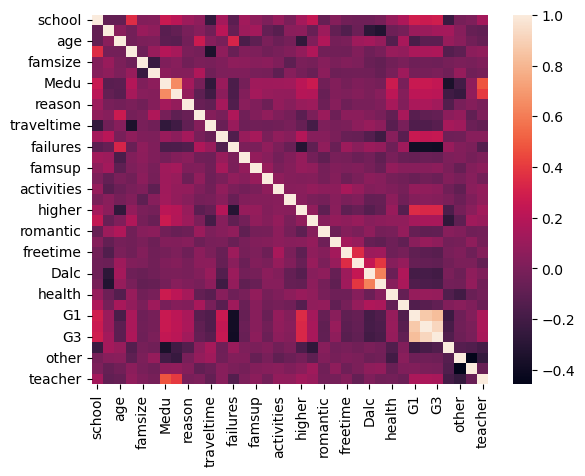

In [380]:
sns.heatmap(porclass_df.corr())

### Conclusiones (primer avance)

 1. Vemos algunas relaciones que parecen intuitivas como por ejemplo el de las calificaciones G1, G2 y G3. 
 2. Es prácticamente nula la relación entre las personas que han reprobado alguna materia con las calificaciones.
 3. La gente con más materias reprobadas no buscan una educación más avanzada al nivel que están cursando.
 4. Hay muchas variables que realmente no aportan mucho al resultado de la investigación o no tienen una relación significativa con la variable objetivo.
 5. Suele haber una relación entre los trabajos de los papás.
